In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import sklearn.preprocessing
from scipy.stats import normaltest
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [2]:
# Global Variables
seed = random.seed(123)
number_clusters = 3

# Analisis Exploratorio

In [3]:
# Variable classification
train_data = pd.read_csv('./data/train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('./data/test.csv', encoding = "ISO-8859-1")
variables = pd.read_csv('./data/variables.txt', encoding = "ISO-8859-1")
quant_vars = list(variables.loc[(variables['Clasification'] == 'Cuantitativa')]['Variable'].values)
quali_vars = list(variables.loc[(variables['Clasification'] == 'Cualitativa')]['Variable'].values)[1:]

### Analizando las variables numericas

In [4]:
train_data[quant_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [ ]:
for var in quant_vars:
    data = train_data[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

### Analizando las variables categoricas

In [ ]:
for var in quali_vars:
  plt.figure(figsize=(20,5))
  train_data[var].value_counts().plot(kind='bar')
  plt.show()

### Analizando la variable de interes

In [7]:
#skewness and kurtosis
print('Skewness: %f' % train_data['SalePrice'].skew())
print('Kurtosis: %f' % train_data['SalePrice'].kurt())
print('\n---Describe---')
train_data['SalePrice'].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 0.95])

Skewness: 1.882876
Kurtosis: 6.536282

---Describe---


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
65%      187500.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
stat,p = stats.shapiro(train_data[["SalePrice"]].dropna())
print('Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(train_data[["SalePrice"]].dropna())
print('Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Kolmogorov-Smirnov:
p=0.000000

Lilliefors:
ks=0.123685
p=0.001000


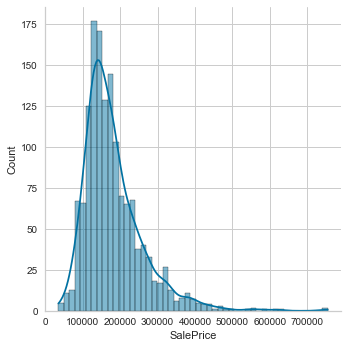

In [9]:
sns.displot(train_data['SalePrice'], kde=True)

### Correlacion

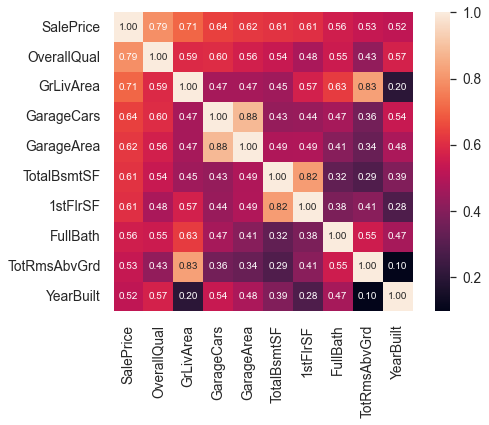

In [11]:
k = 10 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Obteniendo la relacion entre las variables mas significativas

In [16]:
cols = list(cols).append("SalePrice")
sns.pairplot(train_data[cols],hue="SalePrice")
plt.show()
# quant_vars

In [ ]:
Saleprice = cols.pop("SalePrice") 
datos.corr()